<a href="https://colab.research.google.com/github/andresbenintende/TP-IA-2022-G6/blob/master/IC2022_RN_TPG4_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconocimiento de Dígitos Hablados en Inglés

---
Este algoritmo tiene como objetivo predecir dígitos hablados en inglés utilizando la librería Keras en Python.

Este documento presenta tres secciónes: 
- Sección 1: Extracción y tratamiento del dataset
- Sección 2: Entrenamiento del modelo utilizando el dataset original (https://github.com/Jakobovski/free-spoken-digit-dataset)
- Sección 3: Entrenamiento del modelo utilizando un conjunto de datos extra

En la Sección 1 se toman los archivos .WAV y se guardan en archivos .CSV para luego ser almacenados utilizando la librería Pandas.

En la Sección 2 se realiza el procesamiento de los datos, separándolos en datos de entrenamiento, validación y prueba. También se realiza la normalización, preprarándolos para ser ingresados en la Red Neuronal. Por último, se realiza el entrenamiento de la red neuronal, se efectúa la prueba de la misma y se exponen los resultados.

En la Sección 3 es similar a la Sección 2, pero se incluyen datos extra, obtenidos de tres personas con acentos extranjeros:
- Una niña con acento canadiense
- Un hombre con acento hindú
- Un hombre con acento brasileño




# Sección 1
Se generan los archivos .CSV que almacenarán los datos que manejará el modelo.

Datos de entrenamiento (train): /content/drive/MyDrive/IC2022-RN-G4/data/recordings/train

Datos de prueba (test): /content/drive/MyDrive/IC2022-RN-G4/data/recordings/test

Datos Extra para entrenamiento (extraTrainDatatrain): /content/drive/MyDrive/IC2022-RN-G4/data/recordings/TrainExtras

Datos Extra para entrenamiento (extraTestDatatrain): /content/drive/MyDrive/IC2022-RN-G4/data/recordings/TestExtras

In [1]:
# Si es True, se leen los archivos .WAV y se guardan sus características en archivos .CSV
CREATE_CSV_FILES = True

In [2]:
# Se definen los nombres de los archivos .CSV
TRAIN_CSV_FILE = "train.csv"
TEST_CSV_FILE = "test.csv"
EXTRA_TRAIN_CSV_FILE = "extra_train.csv"
EXTRA_TEST_CSV_FILE = "extra_test.csv"

In [4]:
# Se cargan las características de los archivos .WAV en los archivos .CSV
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import librosa
import csv
import os

def cargarCaractWAVs(carpetaWavs, nombreCSV):
    print("Las características de los archivos de la carpeta "+carpetaWavs+" se guardarán en "+nombreCSV)
    header = 'nombre cromagrama raiz_media_cuadrada centroide_espectral ancho_banda_espectral rolloff zero_crossing_rate'
    
    for i in range(1, 21):
        header += f' mfcc{i}'

    header = header.split()
    print('Cabecera CSV: ', header)
    file = open(nombreCSV, 'w', newline='')
    writer = csv.writer(file)
    writer.writerow(header)
 
    for nombre in os.listdir(carpetaWavs):
        wavFile = f'{carpetaWavs}/{nombre}'
        y, sr = librosa.load(wavFile, mono=True, duration=30)

        # Remover silencios al inicio y fin del archivo
        y, index = librosa.effects.trim(y)

        cromagrama = librosa.feature.chroma_stft(y=y, sr=sr)
        raiz_media_cuadrada = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{nombre} {np.mean(cromagrama)} {np.mean(raiz_media_cuadrada)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        writer.writerow(to_append.split())
    file.close()
    print("Fin cargarCaractWAVs")

if (CREATE_CSV_FILES == True):
    cargarCaractWAVs("/content/drive/MyDrive/IC2022-RN-G4/data/recordings/train", TRAIN_CSV_FILE)
    cargarCaractWAVs("/content/drive/MyDrive/IC2022-RN-G4/data/recordings/test", TEST_CSV_FILE)
    cargarCaractWAVs("/content/drive/MyDrive/IC2022-RN-G4/data/recordings/TrainExtras", EXTRA_TRAIN_CSV_FILE)
    cargarCaractWAVs("/content/drive/MyDrive/IC2022-RN-G4/data/recordings/TestExtras", EXTRA_TEST_CSV_FILE)
    print("Se crearon los archivos CSV")
else:
    print("Se omite la creación de archivos CSV")

Las características de los archivos de la carpeta /content/drive/MyDrive/IC2022-RN-G4/data/recordings/train se guardarán en train.csv
Cabecera CSV:  ['nombre', 'cromagrama', 'raiz_media_cuadrada', 'centroide_espectral', 'ancho_banda_espectral', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']
Fin cargarCaractWAVs
Las características de los archivos de la carpeta /content/drive/MyDrive/IC2022-RN-G4/data/recordings/test se guardarán en test.csv
Cabecera CSV:  ['nombre', 'cromagrama', 'raiz_media_cuadrada', 'centroide_espectral', 'ancho_banda_espectral', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']
Fin cargarCaractWAVs
Las características de

In [5]:
# Se lee el dataset y se convierte el nombre del archivo al número correspondiente

import pandas as pd
import csv
from sklearn import preprocessing

def preprocesamientoDatos(csvFileName):
    print("Procesando "+csvFileName+ " ...")
    data = pd.read_csv(csvFileName)
    
    
    filenames = data['nombre'].str[:1]
    
    data['numero'] = data['nombre'].str[:1].astype('int')

    # Se borran las columnas innecesarias
    data = data.drop(['nombre'],axis=1)
    # data = data.drop(['label'],axis=1)
    data = data.drop(['cromagrama'],axis=1)
    data.shape

    print("¡Preprocesamiento finalizado!")
    print(data.head())
    return data

trainData = preprocesamientoDatos(TRAIN_CSV_FILE)
testData = preprocesamientoDatos(TEST_CSV_FILE)
extraTrainData = preprocesamientoDatos(EXTRA_TRAIN_CSV_FILE)
extraTestData = preprocesamientoDatos(EXTRA_TEST_CSV_FILE)

Procesando train.csv ...
¡Preprocesamiento finalizado!
   raiz_media_cuadrada  centroide_espectral  ancho_banda_espectral  \
0             0.075921           824.480154             858.213130   
1             0.074931           774.493499             772.333807   
2             0.028487          1162.843263            1100.444087   
3             0.092833           665.879010             523.023864   
4             0.054151           781.900141             688.667368   

       rolloff  zero_crossing_rate       mfcc1       mfcc2      mfcc3  \
0  1613.644409            0.042297 -322.060059  232.998245 -51.712025   
1  1477.416992            0.040093 -327.737579  218.564575 -25.355339   
2  2580.069247            0.065563 -376.365540  210.174469 -70.058014   
3  1043.093693            0.043457 -340.245453  230.760590  12.917267   
4  1258.154297            0.045875 -401.825195  180.382248 -34.075562   

       mfcc4      mfcc5  ...     mfcc12     mfcc13     mfcc14     mfcc15  \
0  15.939

# Sección 2
El dataset está compuesto por 1500 grabaciones, creadas por cuatro hablantes:
Jackson, Nicolas y THeo
A su vez, se divide de la siguiente manera:
- Los datos de entrenamiento tienen 49 grabaciones para cada dígito de cada hablante: 1470 grabaciones en total. 
- Los datos de prueba tienen una grabación por cada dígito para cada hablante: 30 grabaciones en total.

Los datos utilizados aquí provienen de las grabaciones almacenadas en:

../datos/grabaciones/train

../datos/grabaciones/test

El modelo será entrenado para predecir el dígito hablado.

In [6]:
# Se separa el dataset en tres partes: entrenamiento, validación y prueba
from sklearn.model_selection import train_test_split

X = np.array(trainData.iloc[:, :-1], dtype = float)
y = trainData.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


X_test = np.array(testData.iloc[:, :-1], dtype = float)
y_test = testData.iloc[:, -1]

print("Cantidad de datos para el entrenamiento:", y_train.shape[0])
print("Cantidad de datos para la validación:", y_val.shape[0])
print("Cantidad de datos para la prueba:", y_test.shape[0])

Cantidad de datos para el entrenamiento: 1029
Cantidad de datos para la validación: 441
Cantidad de datos para la prueba: 30


In [7]:
# Se normaliza el dataset utilizando la librería StandarScaler
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_val = scaler.transform( X_val )
X_test = scaler.transform( X_test )

print("Datos de entrada para el entrenamiento", X_train.shape)
print("Datos de entrada para la validación", X_val.shape)
print("Datos de entrada para la prueba", X_test.shape)

Datos de entrada para el entrenamiento (1029, 25)
Datos de entrada para la validación (441, 25)
Datos de entrada para la prueba (30, 25)


In [9]:
# Se crea el modelo de RN. Utilizamos Keras
from keras import models
from keras import layers
import keras

# Modelo
modelo = models.Sequential()
modelo.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
modelo.add(layers.Dropout(0.5))
modelo.add(layers.Dense(128, activation='relu'))
modelo.add(layers.Dropout(0.5))
modelo.add(layers.Dense(64, activation='relu'))
modelo.add(layers.Dropout(0.5))
modelo.add(layers.Dense(10, activation='softmax'))

# Proceso de aprendizaje del modelo
modelo.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Parada temprana con 3 épocas de paciencia (sin este valor, el entranamiento finaliza en la segunda época)
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

# Entrenamiento del modelo con 50 épocas y parada temprana para evitar sobre-entrenamiento
historia = modelo.fit(X_train,y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=128,
                    callbacks=[es])

Epoch 1/50
9/9 [==============================] - 1s 24ms/step - loss: 2.4439 - accuracy: 0.1361 - val_loss: 2.1551 - val_accuracy: 0.3356
Epoch 2/50
9/9 [==============================] - 0s 7ms/step - loss: 2.2355 - accuracy: 0.1652 - val_loss: 2.0617 - val_accuracy: 0.4580
Epoch 3/50
9/9 [==============================] - 0s 7ms/step - loss: 2.0758 - accuracy: 0.2604 - val_loss: 1.9404 - val_accuracy: 0.5556
Epoch 4/50
9/9 [==============================] - 0s 6ms/step - loss: 1.9981 - accuracy: 0.2896 - val_loss: 1.7919 - val_accuracy: 0.6100
Epoch 5/50
9/9 [==============================] - 0s 7ms/step - loss: 1.8574 - accuracy: 0.3450 - val_loss: 1.6410 - val_accuracy: 0.6281
Epoch 6/50
9/9 [==============================] - 0s 7ms/step - loss: 1.6943 - accuracy: 0.4023 - val_loss: 1.4672 - val_accuracy: 0.6531
Epoch 7/50
9/9 [==============================] - 0s 8ms/step - loss: 1.6367 - accuracy: 0.4295 - val_loss: 1.2711 - val_accuracy: 0.7098
Epoch 8/50
9/9 [=================

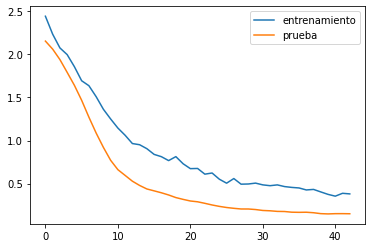

In [10]:
# Representación gráfica del entrenamiento
from matplotlib import pyplot
pyplot.plot(historia.history['loss'], label='entrenamiento')
pyplot.plot(historia.history['val_loss'], label='prueba')
pyplot.legend()
pyplot.show()

# Funciones auxiliares
Estas funciones sirven para presentar los resultados obtenidos:
- mostrarPrediccion: muestra el resultado de la predicción de los datos de prueba.
- reporte: muestra un reporte de los resultados utilizando una matriz de confusión

In [11]:
# Función para imprimir el resultado de las predicciones
def mostrarPrediccion(X_data, y_data):
    print('\n# Generando predicciones...')
    for i in range(len(y_data)):
        prediction = np.argmax(modelo.predict(X_data[i:i+1]),axis=1)
        print("y={} | predicción={} | Coincidencia={}".format(y_data[i], prediction, y_data[i]==float(prediction[0])))

In [12]:
# Función para generar matriz de confusión y un reporte de clasificación
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

def reporte(X_data, y_data):
    Y_pred = np.argmax(modelo.predict(X_data),axis=1)
    
    y_test_num = y_data.astype(np.int64)
    print('Matriz de Confusión')
    conf_mt = confusion_matrix(y_test_num, Y_pred)
    print(conf_mt)
    plt.matshow(conf_mt)
    plt.show()
    
    print('\nReporte de Clasificación')
    target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    print(classification_report(y_test_num, Y_pred, target_names=target_names))

# Presentación de la performance del modelo

In [13]:
print('\n# DATOS DE PRUEBA #\n')
puntaje = modelo.evaluate(X_test, y_test)
print("%s: %.2f%%" % (modelo.metrics_names[1], puntaje[1]*100))

# Predicción
mostrarPrediccion(X_test, y_test)


# DATOS DE PRUEBA #

1/1 [==============================] - 0s 17ms/step - loss: 0.2496 - accuracy: 0.9000
accuracy: 90.00%

# Generando predicciones...
y=4 | predicción=[4] | Coincidencia=True
y=6 | predicción=[6] | Coincidencia=True
y=9 | predicción=[9] | Coincidencia=True
y=5 | predicción=[5] | Coincidencia=True
y=6 | predicción=[6] | Coincidencia=True
y=4 | predicción=[4] | Coincidencia=True
y=0 | predicción=[0] | Coincidencia=True
y=7 | predicción=[7] | Coincidencia=True
y=9 | predicción=[9] | Coincidencia=True
y=1 | predicción=[1] | Coincidencia=True
y=8 | predicción=[8] | Coincidencia=True
y=0 | predicción=[0] | Coincidencia=True
y=8 | predicción=[8] | Coincidencia=True
y=0 | predicción=[2] | Coincidencia=False
y=2 | predicción=[2] | Coincidencia=True
y=1 | predicción=[1] | Coincidencia=True
y=5 | predicción=[5] | Coincidencia=True
y=5 | predicción=[5] | Coincidencia=True
y=3 | predicción=[3] | Coincidencia=True
y=4 | predicción=[4] | Coincidencia=True
y=6 | predicción=[6] | Co

Reporte de Clasificación para Datos de Prueba

Matriz de Confusión
[[2 0 1 0 0 0 0 0 0 0]
 [0 2 0 0 1 0 0 0 0 0]
 [0 0 2 1 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 3]]


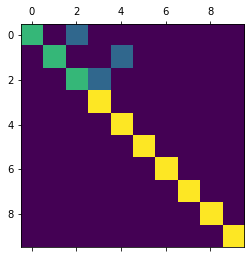


Reporte de Clasificación
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      0.67      0.80         3
           2       0.67      0.67      0.67         3
           3       0.75      1.00      0.86         3
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



In [14]:
print("Reporte de Clasificación para Datos de Prueba\n")
reporte(X_test, y_test)

# Sección 3
Además del dataset utilizado en la Sección 2, se agregan 60 grabaciones extra de personas con acentos especiales:
- **Caroline**: Niña canadiense
- **Ankur**: Hombre originario de India
- **Rodolfo**: Hombre originario de Brasil

Cada uno de los hablantes generó, para cada dígito, una grabación para entrenamiento y una para pruebas.

Por lo tanto, el conjunto de datos completo tiene:

- Entrenamiento: 1500 grabaciones
- Prueba: 60 grabaciones
Los datos utilizados aquí provienen de las grabaciones almacenadas en:

../datos/grabaciones/train

../datos/grabaciones/test

../data/recordings/TrainExtras

../data/recordings/TestExtras


In [15]:
# Se separa el dataset en tres partes: entrenamiento, validación y prueba
from sklearn.model_selection import train_test_split

datosTrain = trainData.append(extraTrainData)

X = np.array(datosTrain.iloc[:, :-1], dtype = float)
y = datosTrain.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

X_test = np.array(testData.iloc[:, :-1], dtype = float)
y_test = testData.iloc[:, -1]

X_extra_test = np.array(extraTestData.iloc[:, :-1], dtype = float)
y_extra_test = extraTestData.iloc[:, -1]

print("Cantidad de datos para el entrenamiento:", y_train.shape[0])
print("Cantidad de datos para la validación:", y_val.shape[0])
print("Cantidad de datos para la prueba:", y_test.shape[0])
print("Cantidad de datos extra para la prueba:", y_extra_test.shape[0])

Cantidad de datos para el entrenamiento: 1050
Cantidad de datos para la validación: 450
Cantidad de datos para la prueba: 30
Cantidad de datos extra para la prueba: 30


In [16]:
# Se normaliza el dataset utilizando la librería StandarScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_val = scaler.transform( X_val )
X_test = scaler.transform( X_test )
X_extra_test = scaler.transform( X_extra_test )

print("Datos de entrada para el entrenamiento", X_train.shape)
print("Datos de entrada para la validación", X_val.shape)
print("Datos de entrada para la prueba", X_test.shape)
print("Datos extra de entrada para la prueba", X_extra_test.shape)

Datos de entrada para el entrenamiento (1050, 25)
Datos de entrada para la validación (450, 25)
Datos de entrada para la prueba (30, 25)
Datos extra de entrada para la prueba (30, 25)


In [17]:
# Se crea el modelo de RN. Utilizamos Keras
from keras import models
from keras import layers
import keras

# Modelo
modelo = models.Sequential()
modelo.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
modelo.add(layers.Dropout(0.5))
modelo.add(layers.Dense(128, activation='relu'))
modelo.add(layers.Dropout(0.5))
modelo.add(layers.Dense(64, activation='relu'))
modelo.add(layers.Dropout(0.5))
modelo.add(layers.Dense(10, activation='softmax'))

# Proceso de Aprendizaje del modelo
modelo.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Parada temprana con 3 épocas de paciencia (sin este valor, el entranamiento finaliza en la segunda época)
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

# Entrenamiento del modelo con 50 épocas y parada temprana para evitar sobre-entrenamiento
historia = modelo.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=128,
                    callbacks=[es])

Epoch 1/50
9/9 [==============================] - 1s 24ms/step - loss: 2.4450 - accuracy: 0.1438 - val_loss: 2.0985 - val_accuracy: 0.3156
Epoch 2/50
9/9 [==============================] - 0s 8ms/step - loss: 2.2044 - accuracy: 0.1990 - val_loss: 1.9607 - val_accuracy: 0.5467
Epoch 3/50
9/9 [==============================] - 0s 9ms/step - loss: 2.0613 - accuracy: 0.2724 - val_loss: 1.7959 - val_accuracy: 0.6600
Epoch 4/50
9/9 [==============================] - 0s 7ms/step - loss: 1.8945 - accuracy: 0.3371 - val_loss: 1.5991 - val_accuracy: 0.7089
Epoch 5/50
9/9 [==============================] - 0s 7ms/step - loss: 1.7652 - accuracy: 0.3695 - val_loss: 1.4032 - val_accuracy: 0.7511
Epoch 6/50
9/9 [==============================] - 0s 8ms/step - loss: 1.6036 - accuracy: 0.4181 - val_loss: 1.2057 - val_accuracy: 0.7800
Epoch 7/50
9/9 [==============================] - 0s 7ms/step - loss: 1.5260 - accuracy: 0.4552 - val_loss: 1.0353 - val_accuracy: 0.8267
Epoch 8/50
9/9 [=================

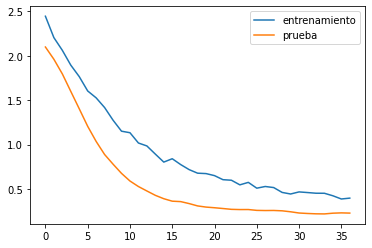

In [18]:
# Representación gráfica del entrenamiento
from matplotlib import pyplot
pyplot.plot(historia.history['loss'], label='entrenamiento')
pyplot.plot(historia.history['val_loss'], label='prueba')
pyplot.legend()
pyplot.show()

# Presentación de la performance del modelo

In [19]:
print('\n# DATOS DE PRUEBA #\n')
puntaje = modelo.evaluate(X_test, y_test)
print("%s: %.2f%%" % (modelo.metrics_names[1], puntaje[1]*100))

# Predicción
mostrarPrediccion(X_test, y_test)


# DATOS DE PRUEBA #

1/1 [==============================] - 0s 16ms/step - loss: 0.2468 - accuracy: 0.9333
accuracy: 93.33%

# Generando predicciones...
y=4 | predicción=[4] | Coincidencia=True
y=6 | predicción=[6] | Coincidencia=True
y=9 | predicción=[9] | Coincidencia=True
y=5 | predicción=[5] | Coincidencia=True
y=6 | predicción=[6] | Coincidencia=True
y=4 | predicción=[4] | Coincidencia=True
y=0 | predicción=[0] | Coincidencia=True
y=7 | predicción=[7] | Coincidencia=True
y=9 | predicción=[9] | Coincidencia=True
y=1 | predicción=[1] | Coincidencia=True
y=8 | predicción=[8] | Coincidencia=True
y=0 | predicción=[0] | Coincidencia=True
y=8 | predicción=[8] | Coincidencia=True
y=0 | predicción=[2] | Coincidencia=False
y=2 | predicción=[2] | Coincidencia=True
y=1 | predicción=[1] | Coincidencia=True
y=5 | predicción=[5] | Coincidencia=True
y=5 | predicción=[5] | Coincidencia=True
y=3 | predicción=[3] | Coincidencia=True
y=4 | predicción=[4] | Coincidencia=True
y=6 | predicción=[6] | Co

In [20]:
print('\n# DATOS DE PRUEBA EXTRA #\n')
puntaje = modelo.evaluate(X_extra_test, y_extra_test)
print("%s: %.2f%%" % (modelo.metrics_names[1], puntaje[1]*100))

# Predicción
mostrarPrediccion(X_extra_test, y_extra_test)


# DATOS DE PRUEBA EXTRA #

1/1 [==============================] - 0s 16ms/step - loss: 2.7595 - accuracy: 0.2667
accuracy: 26.67%

# Generando predicciones...
y=9 | predicción=[0] | Coincidencia=False
y=6 | predicción=[6] | Coincidencia=True
y=5 | predicción=[2] | Coincidencia=False
y=8 | predicción=[6] | Coincidencia=False
y=3 | predicción=[8] | Coincidencia=False
y=1 | predicción=[9] | Coincidencia=False
y=2 | predicción=[6] | Coincidencia=False
y=2 | predicción=[8] | Coincidencia=False
y=7 | predicción=[0] | Coincidencia=False
y=3 | predicción=[3] | Coincidencia=True
y=4 | predicción=[8] | Coincidencia=False
y=4 | predicción=[5] | Coincidencia=False
y=9 | predicción=[9] | Coincidencia=True
y=8 | predicción=[6] | Coincidencia=False
y=4 | predicción=[5] | Coincidencia=False
y=0 | predicción=[8] | Coincidencia=False
y=0 | predicción=[8] | Coincidencia=False
y=8 | predicción=[8] | Coincidencia=True
y=1 | predicción=[1] | Coincidencia=True
y=5 | predicción=[5] | Coincidencia=True
y=5 | 

Reporte de Clasificación para Datos de Prueba

Matriz de Confusión
[[2 0 1 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 0 2 1 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 3]]


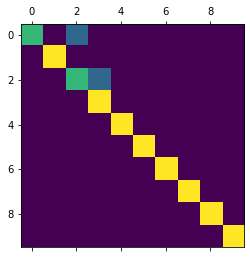


Reporte de Clasificación
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         3
           2       0.67      0.67      0.67         3
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

Reporte de Clasificación para Datos de Prueba Extra

Matriz de Confusión
[[0 1 0 0 0 0 0 0 2 0]
 [0 1 0 0 1 0 0 0 0 1]
 [1 0 0 0 0 0 1 0 1 0]
 [0 0 0 1 0 0 1 0 1 0]
 [0 0 0 0 0 2 0 0 1 0]
 [0 0 1 0 0 2 0 0 0 0]
 [0 

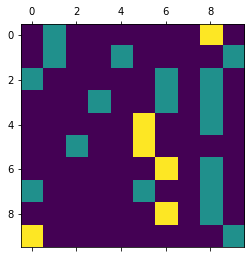


Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      0.33      0.40         3
           2       0.00      0.00      0.00         3
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         3
           5       0.40      0.67      0.50         3
           6       0.33      0.67      0.44         3
           7       0.00      0.00      0.00         3
           8       0.12      0.33      0.18         3
           9       0.50      0.33      0.40         3

    accuracy                           0.27        30
   macro avg       0.29      0.27      0.24        30
weighted avg       0.29      0.27      0.24        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
print("Reporte de Clasificación para Datos de Prueba\n")
reporte(X_test, y_test)

print("Reporte de Clasificación para Datos de Prueba Extra\n")
reporte(X_extra_test, y_extra_test)